In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# RC Circuit

### Load Data

In [2]:
df = pd.read_csv("RC.csv")

f = df['frequency']
f_unc = df['f unc']
VC = df['VC']
VC = [x / (2 * np.sqrt(2)) for x in VC]
VC_unc = df['VC unc']
VC_unc = [x / (2 * np.sqrt(2)) for x in VC_unc]
VR = df['VR']
VR = [x / (2 * np.sqrt(2)) for x in VR]
VR_unc = df["VR unc"]
VR_unc = [x / (2 * np.sqrt(2)) for x in VR_unc]
time = df['time']
time_unc = df['time unc']

### VC vs Frequency (Processed)

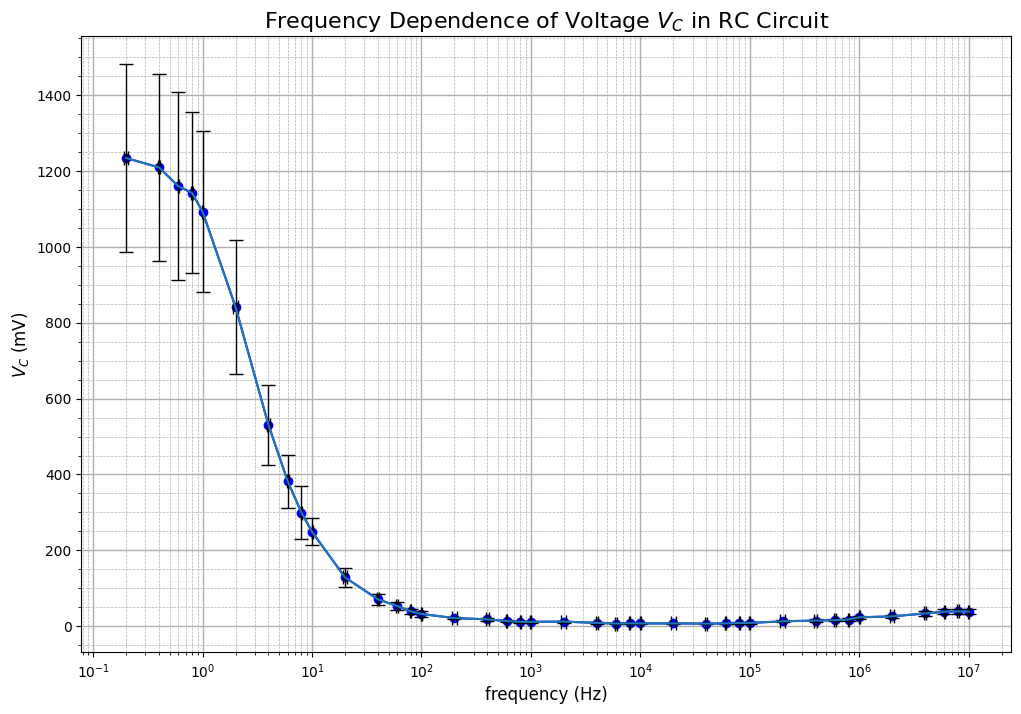

In [3]:
plt.figure(figsize=(12, 8))
plt.plot(f, VC, marker='o', color='blue')
plt.errorbar(f, VC, xerr=f_unc, yerr=VC_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
#plt.yscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of Voltage $V_C$ in RC Circuit", fontsize=16)
plt.ylabel("$V_C$ (mV)", fontsize=12)
plt.xlabel("frequency (Hz)", fontsize=12)
#plt.savefig("RC VC-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### XC vs Frequency (Processed)

In [4]:
XC = [(vc/1000)*(50+39)/np.sqrt((3.5/(2*np.sqrt(2)))**2 - (vc/1000)**2) for vc in VC]

def round_to_sf(x, n):
    return float(f"{x:.{n}g}")

XC = [round_to_sf(x, 3) for x in XC]

vt = 3.5/(2*np.sqrt(2))
XC_unc = [xc*np.sqrt(2*(vc_unc/vc)**2 + 0.05**2 + 0.01**2) for xc, vc, vc_unc in zip(XC, VC, VC_unc)]
XC_unc = [round_to_sf(x, 1) for x in XC_unc]

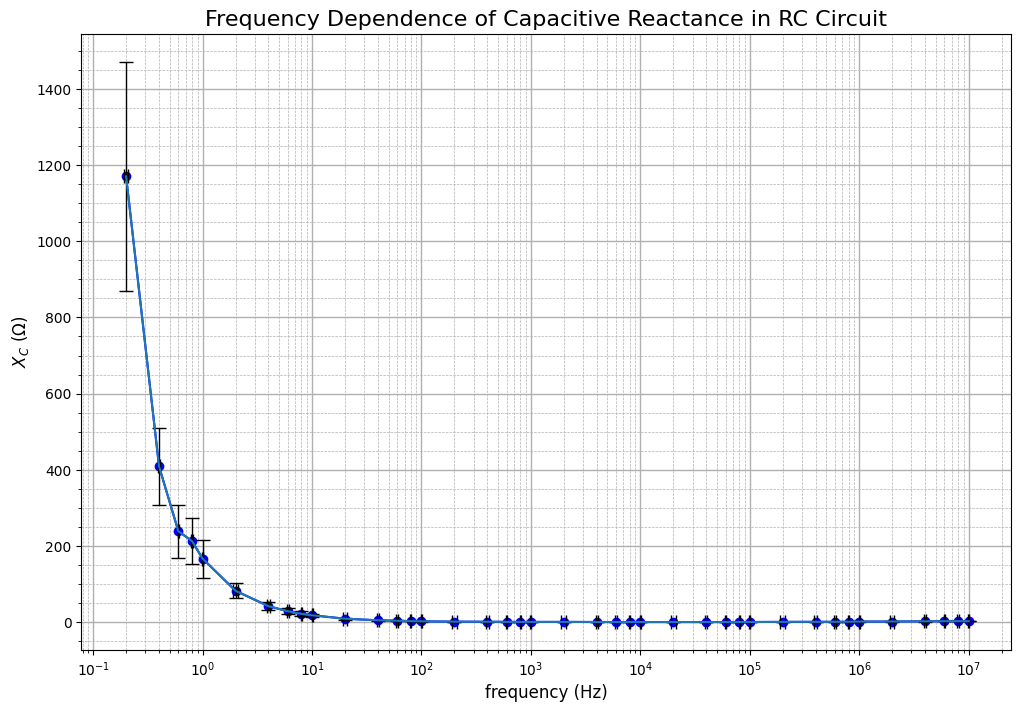

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(f, XC, marker='o', color='b')
plt.errorbar(f, XC, xerr=f_unc, yerr=XC_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
#plt.yscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of Capacitive Reactance in RC Circuit", fontsize=16)
plt.ylabel("$X_C$ ($\Omega$)", fontsize=12)
plt.xlabel("frequency (Hz)", fontsize=12)
#plt.savefig("RC XC-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### XC vs 1/Frequency (Processed)

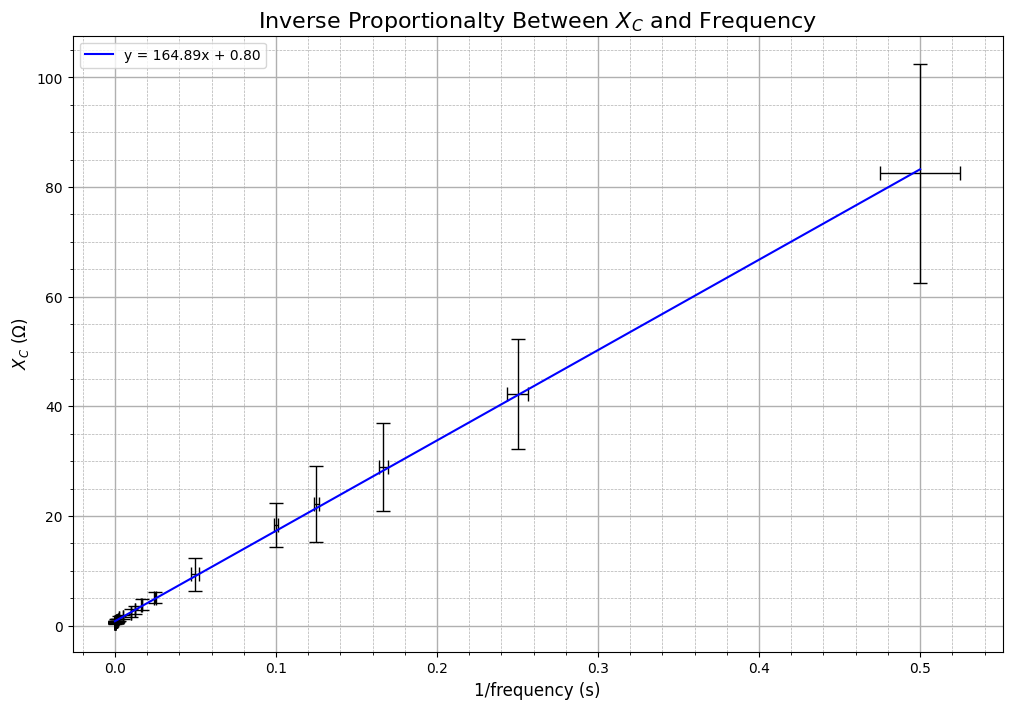

In [6]:
T_unc = [func / (f**2) for func, f in zip(f_unc, f)]

f2 = f[5:-10]
XC2 = XC[5:-10]
T_unc2 = T_unc[5:-10]
XC_unc2 = XC_unc[5:-10]

plt.figure(figsize=(12, 8))
plt.errorbar(
    1 / f2, XC2, xerr=T_unc2, yerr=XC_unc2,
    fmt='', linestyle='', color='b', ecolor='black', capsize=5, capthick=1, elinewidth=1
)

coefficients = np.polyfit(1 / f2, XC2, 1)
m, c = coefficients
trend_lineC = m * (1 / f2) + c
plt.plot(1 / f2, trend_lineC, color='blue', label=f'y = {m:.2f}x + {c:.2f}')

plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.title("Inverse Proportionalty Between $X_C$ and Frequency", fontsize=16)
plt.ylabel("$X_C$ ($\Omega$)", fontsize=12)
plt.xlabel("1/frequency (s)", fontsize=12)
#plt.savefig("RC XC-T.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

In [7]:
coefficients, cov_matrix = np.polyfit(1 / f2, XC2, 1, cov=True)
m, c = coefficients
m_unc, c_unc = np.sqrt(np.diag(cov_matrix))

print(f"Gradient (m): {m:.5f} ± {m_unc:.5f}")
print(f"Y-Intercept (c): {c:.5f} ± {c_unc:.5f}")

Gradient (m): 164.88539 ± 0.70229
Y-Intercept (c): 0.79876 ± 0.08539


### VR vs Frequency (Processed)

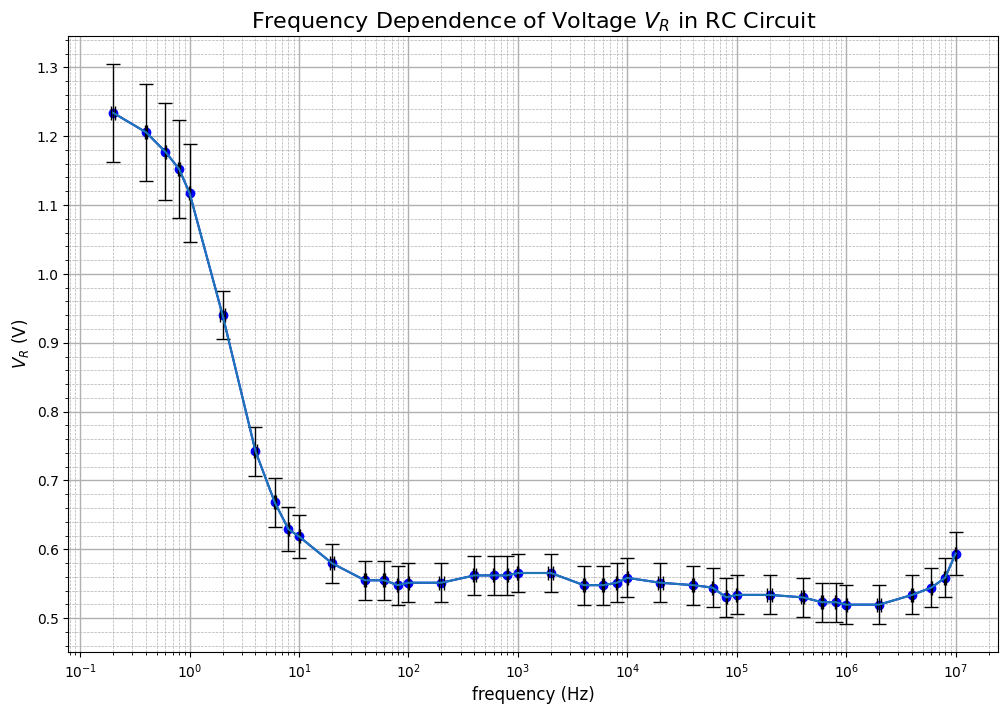

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(f, VR, marker='o', color='blue')
plt.errorbar(f, VR, xerr=f_unc, yerr=VR_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
#plt.yscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of Voltage $V_R$ in RC Circuit", fontsize=16)
plt.ylabel("$V_R$ (V)", fontsize=12)
plt.xlabel("frequency (Hz)", fontsize=12)
#plt.savefig("RC VR-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### Phase Shift vs Frequency (Processed)

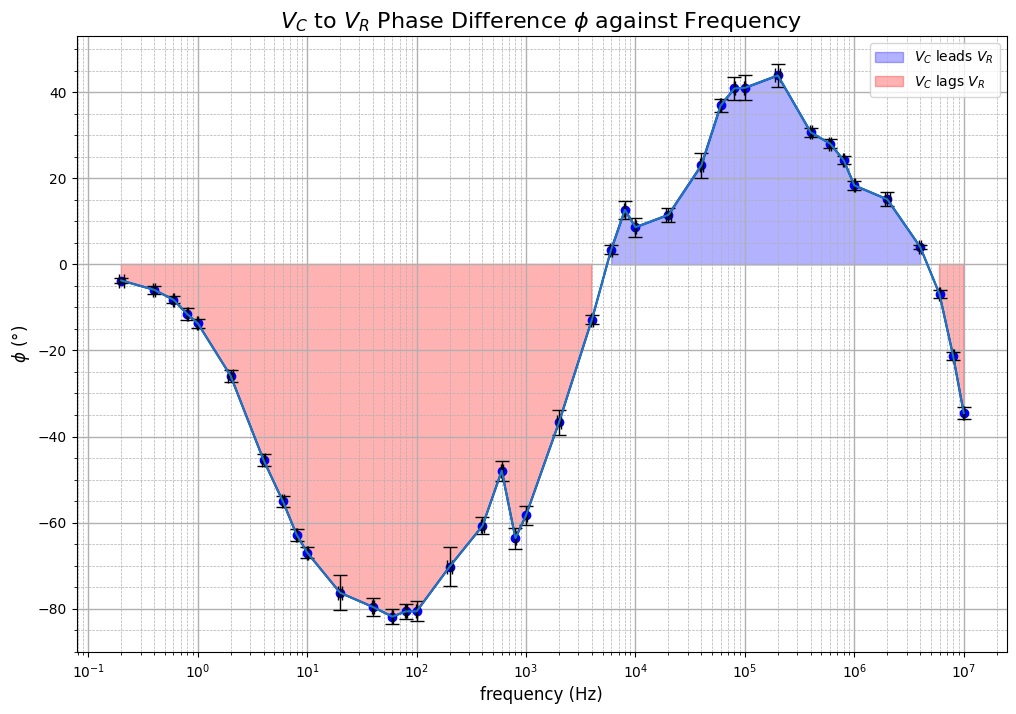

In [9]:
phi = [(360*freq*t*10**-6) for freq, t in zip(f, time)]

phi_unc = [np.abs(phi)*np.sqrt((t_unc/t)**2 + (f_unc/f)**2) for phi, t_unc, t, f_unc, f in zip(phi, time_unc, time, f_unc, f)]

plt.figure(figsize=(12, 8))
plt.plot(f, phi, marker='o', color='b')
plt.errorbar(f, phi, xerr=f_unc, yerr=phi_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()

plt.fill_between(f, phi, 0, where=(np.array(phi) > 0), color='blue', alpha=0.3, label='$V_C$ leads $V_R$')
plt.fill_between(f, phi, 0, where=(np.array(phi) < 0), color='red', alpha=0.3, label='$V_C$ lags $V_R$')
plt.title("$V_C$ to $V_R$ Phase Difference $\phi$ against Frequency", fontsize=16)
plt.ylabel("$\phi$ ($\degree$)", fontsize=12)
plt.xlabel("frequency (Hz)", fontsize=12)
plt.legend()
#plt.savefig("RC phi-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

# RL Circuit

### Load Data

In [10]:
df = pd.read_csv("RL.csv")

f = df['frequency']
f_unc = df['f unc']
VL = df['VL']
VL = [x / (2 * np.sqrt(2)) for x in VL]
VL_unc = df['VL unc']
VL_unc = [x / (2 * np.sqrt(2)) for x in VL_unc]
VR = df['VR']
VR = [x / (2 * np.sqrt(2)) for x in VR]
VR_unc = df["VR unc"]
VR_unc = [x / (2 * np.sqrt(2)) for x in VR_unc]
time = df['time']
time_unc = df['time unc']

### VL vs Frequency (Processed)

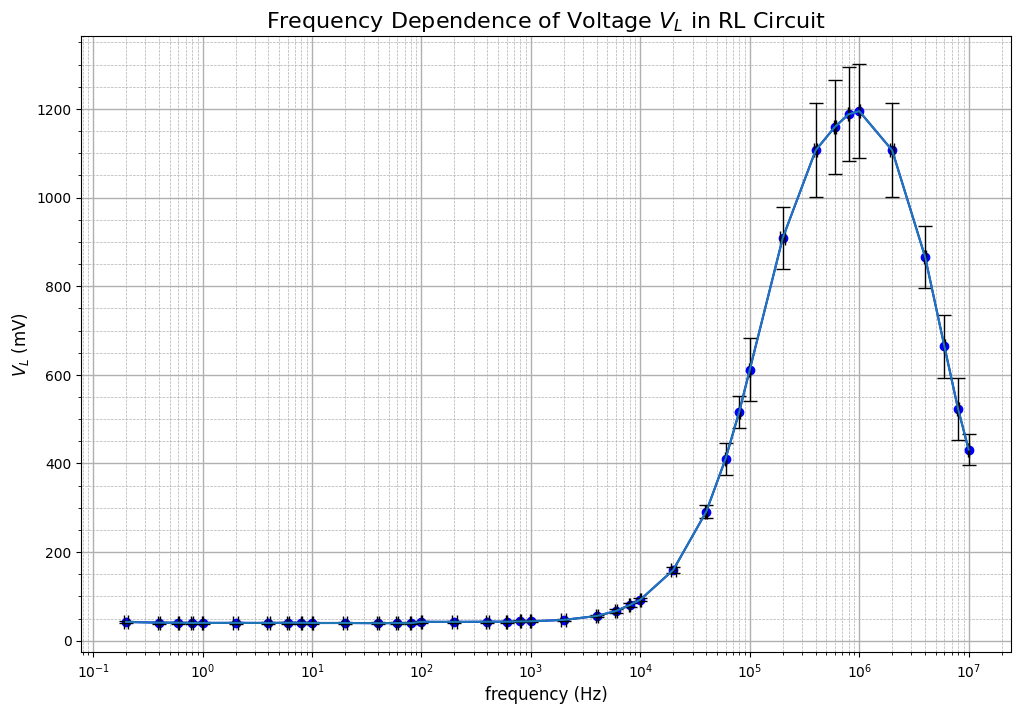

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(f, VL, marker='o', color='blue')
plt.errorbar(f, VL, xerr=f_unc, yerr=VL_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
#plt.yscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of Voltage $V_L$ in RL Circuit", fontsize=16)
plt.ylabel("$V_L$ (mV)", fontsize=12)
plt.xlabel("frequency (Hz)", fontsize=12)
#plt.savefig("RL VL-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### XL vs Frequency (Processed)

In [12]:
vt = 3.5/(2*np.sqrt(2))
XL = [(vl/1000)*(50+39)/np.sqrt((vt)**2 - (vl/1000)**2) for vl in VL]
XL = [round_to_sf(x, 3) for x in XL]
XL_unc = [xl*np.sqrt(2*(vl_unc/vl)**2 + 0.05**2 + 0.01**2) for xl, vl, vl_unc in zip(XL, VL, VL_unc)]
XL_unc = [round_to_sf(x, 1) for x in XL_unc]

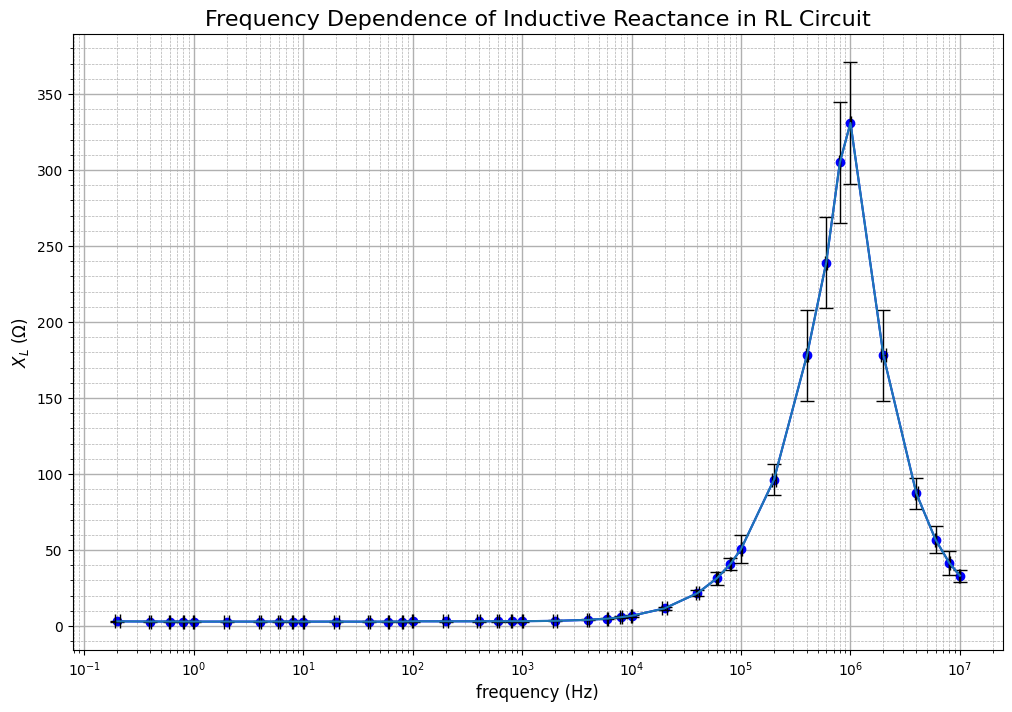

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(f, XL, marker='o', color='b')
plt.errorbar(f, XL, xerr=f_unc, yerr=XL_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
#plt.yscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of Inductive Reactance in RL Circuit", fontsize=16)
plt.ylabel("$X_L$ ($\Omega$)", fontsize=12)
plt.xlabel("frequency (Hz)", fontsize=12)
#plt.savefig("RL XL-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### XL vs Frequency (Castrated) (Processed)

Gradient (m): 0.00048 ± 0.000003
Y-Intercept (c): 2.71546 ± 0.06902


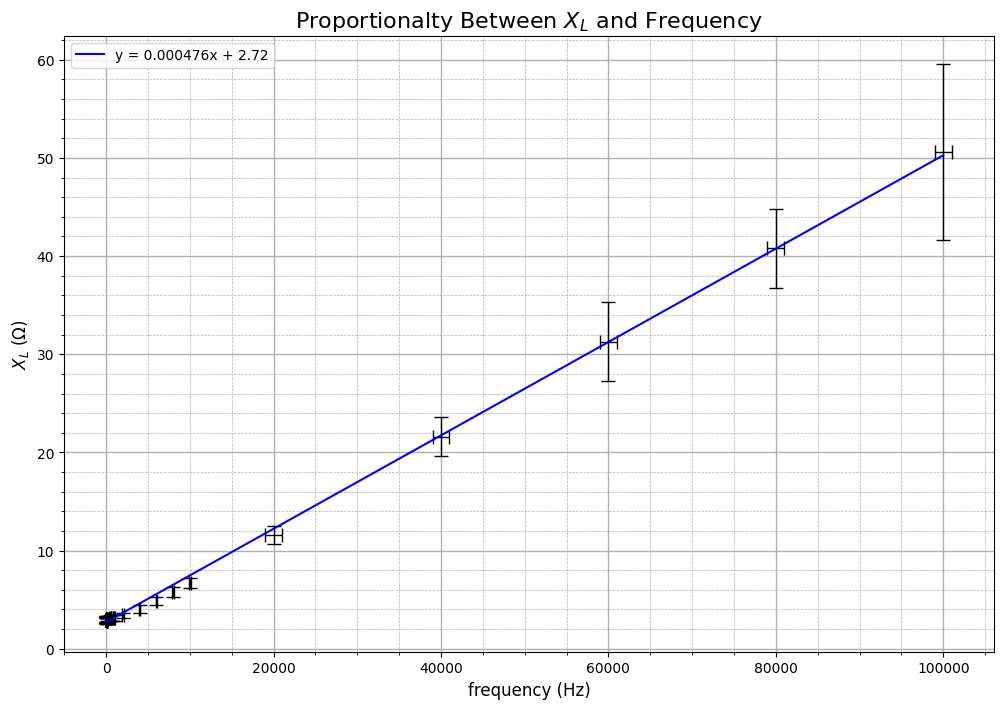

In [14]:
f2L = f[:-10]
XL2 = XL[:-10]
f_unc2L = f_unc[:-10]
XL_unc2 = XL_unc[:-10]

plt.figure(figsize=(12, 8))
plt.errorbar(
    f2L, XL2, xerr=f_unc2L, yerr=XL_unc2,
    fmt='', linestyle='', color='b', ecolor='black', capsize=5, capthick=1, elinewidth=1
)

coefficients = np.polyfit(f2L, XL2, 1)
m, c = coefficients
trend_lineL = m * (f2L) + c
plt.plot(f2L, trend_lineL, color='blue', label=f'y = {m:.6f}x + {c:.2f}')

coefficients, cov_matrix = np.polyfit(f2L, XL2, 1, cov=True)
m, c = coefficients
m_unc, c_unc = np.sqrt(np.diag(cov_matrix))
print(f"Gradient (m): {m:.5f} ± {m_unc:.6f}")
print(f"Y-Intercept (c): {c:.5f} ± {c_unc:.5f}")

plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.title("Proportionalty Between $X_L$ and Frequency", fontsize=16)
plt.ylabel("$X_L$ ($\Omega$)", fontsize=12)
plt.xlabel("frequency (Hz)", fontsize=12)
#plt.savefig("RL XL-f cast.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### VR vs Frequency (Raw)

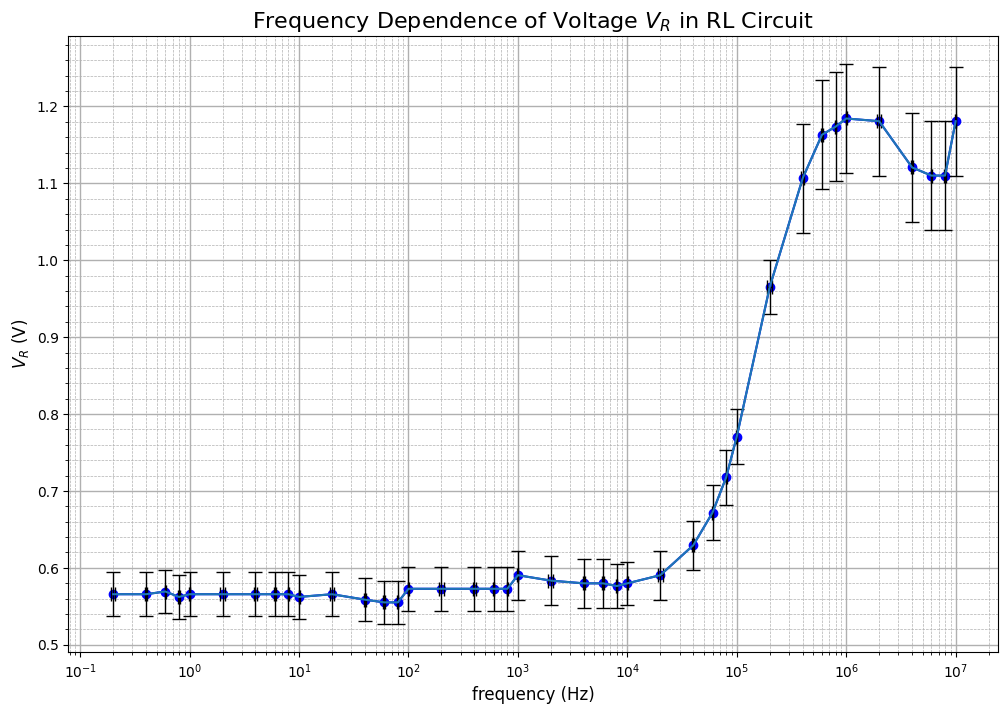

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(f, VR, marker='o', color='blue')
plt.errorbar(f, VR, xerr=f_unc, yerr=VR_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
#plt.yscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of Voltage $V_R$ in RL Circuit", fontsize=16)
plt.ylabel("$V_R$ (V)", fontsize=12)
plt.xlabel("frequency (Hz)", fontsize=12)
#plt.savefig("RL VR-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### Phase Shift vs Frequency (Raw)

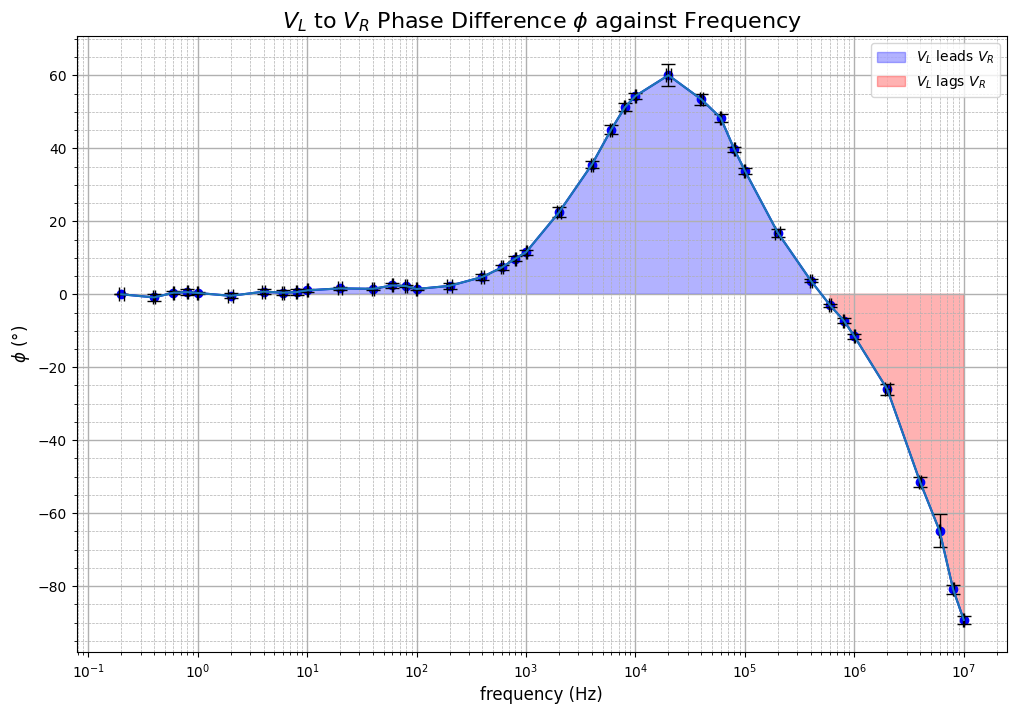

In [16]:
phi = [(360*freq*t*10**-6) for freq, t in zip(f, time)]

epsilon = 1e-10
phi_unc = [
    np.abs(phi) * np.sqrt((t_unc / (t if t != 0 else epsilon))**2 + (f_unc / f)**2)
    for phi, t_unc, t, f_unc, f in zip(phi, time_unc, time, f_unc, f)
]

plt.figure(figsize=(12, 8))
plt.plot(f, phi, marker='o', color='b')
plt.errorbar(f, phi, xerr=f_unc, yerr=phi_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()

plt.fill_between(f, phi, 0, where=(np.array(phi) > 0), color='blue', alpha=0.3, label='$V_L$ leads $V_R$')
plt.fill_between(f, phi, 0, where=(np.array(phi) < 0), color='red', alpha=0.3, label='$V_L$ lags $V_R$')
plt.title("$V_L$ to $V_R$ Phase Difference $\phi$ against Frequency", fontsize=16)
plt.ylabel("$\phi$ ($\degree$)", fontsize=12)
plt.xlabel("frequency (Hz)", fontsize=12)
plt.legend()
#plt.savefig("RL phi-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### Resonance Investigation (Processed)

In [17]:
from scipy.interpolate import interp1d

f3 = f[5:-10]
trend_lineC = trend_lineC
trend_lineL = trend_lineL[5:]

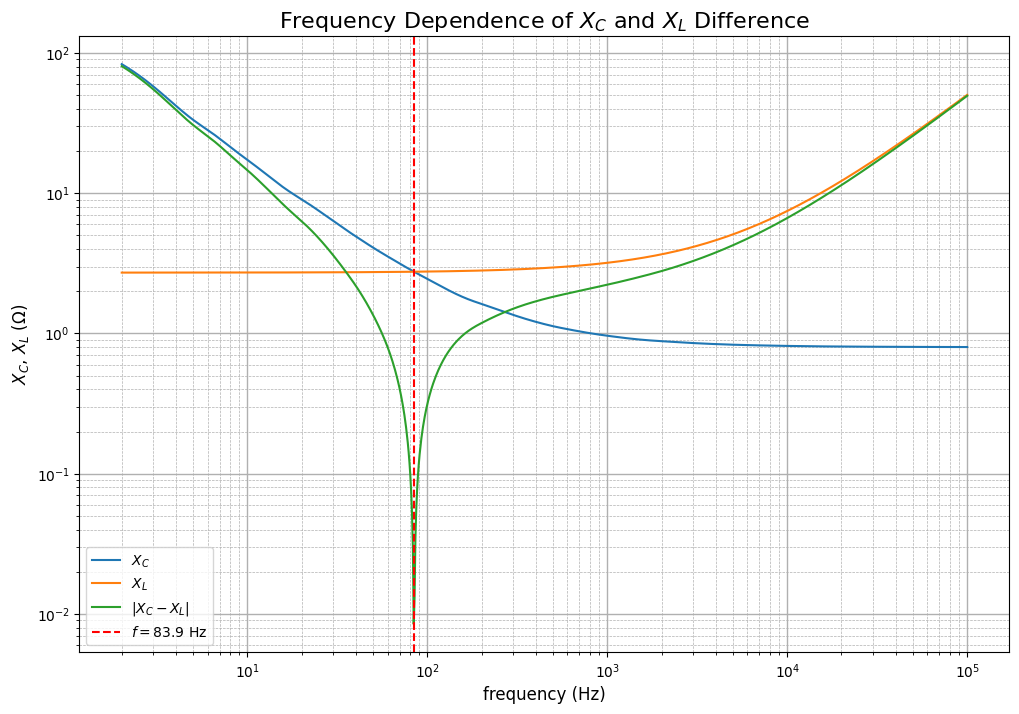

In [18]:
f_dense = np.logspace(np.log10(f3.min()), np.log10(f3.max()), 1000)
interp_C = interp1d(f3, trend_lineC, kind='cubic', fill_value="extrapolate")
interp_L = interp1d(f3, trend_lineL, kind='cubic', fill_value="extrapolate")

trend_lineC_smooth = interp_C(f_dense)
trend_lineL_smooth = interp_L(f_dense)
diff_smooth = np.abs(trend_lineC_smooth - trend_lineL_smooth)

zero_index = np.argmin(np.abs(diff_smooth))
f_zero = f_dense[zero_index]

plt.figure(figsize=(12, 8))
plt.plot(f_dense, trend_lineC_smooth, label='$X_C$')
plt.plot(f_dense, trend_lineL_smooth, label='$X_L$')
plt.plot(f_dense, diff_smooth, label='|$X_C - X_L$|')
plt.axvline(x=f_zero, color='red', linestyle='--', label=f'$f = {f_zero:.1f}$ Hz')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of $X_C$ and $X_L$ Difference", fontsize=16)
plt.ylabel("$X_C$, $X_L$ ($\Omega$)", fontsize=12)
plt.xlabel("frequency (Hz)", fontsize=12)
plt.legend()
#plt.savefig("RL XCXCdiff.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

# RLC Series

### Load Data

In [19]:
df = pd.read_csv("RLC Series.csv")

f = df['frequency']
f_unc = df['f unc']
V = df['V']
V = [x / (2 * np.sqrt(2)) for x in V]
V_unc = df['V unc']
V_unc = [x / (2 * np.sqrt(2)) for x in V_unc]
VR = df['VR']
VR = [x / (2 * np.sqrt(2)) for x in VR]
VR_unc = df["VR unc"]
VR_unc = [x / (2 * np.sqrt(2)) for x in VR_unc]
timeVVR = df['time V-VR']
VVR_unc = df['V-VR unc']
timeVCVL = df['time VC-VL']
VCVL_unc = df['VC-VL unc']

### V vs Frequency (Processed)

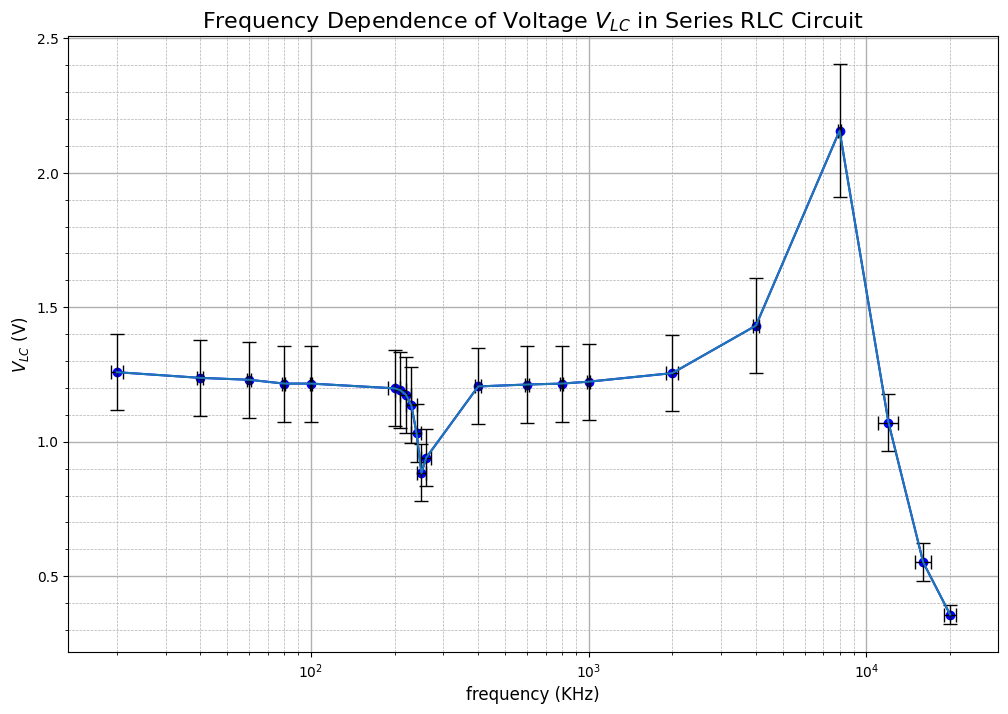

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(f, V, marker='o', color='blue')
plt.errorbar(f, V, xerr=f_unc, yerr=V_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
#plt.yscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of Voltage $V_{LC}$ in Series RLC Circuit", fontsize=16)
plt.ylabel("$V_{LC}$ (V)", fontsize=12)
plt.xlabel("frequency (KHz)", fontsize=12)
#plt.savefig("RLC VLC-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### VR vs Frequency (Processed)

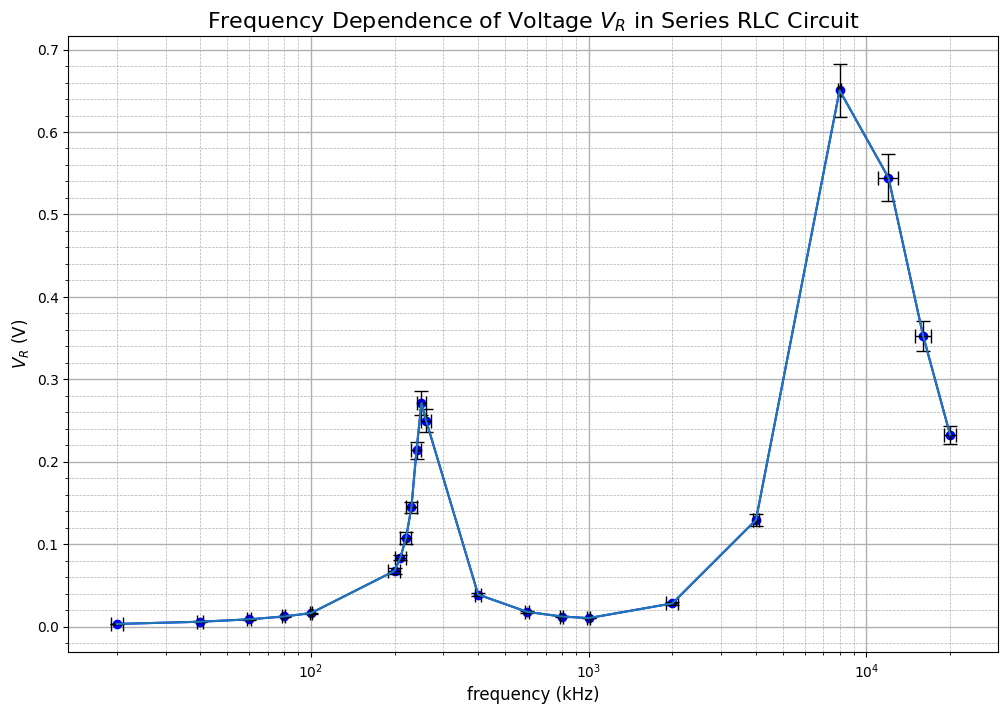

In [21]:
plt.figure(figsize=(12, 8))
VR_k = [x / 1000 for x in VR]
VR_unc_k = [unc / 1000 for unc in VR_unc]
plt.plot(f, VR_k, marker='o', color='blue')
plt.errorbar(f, VR_k, xerr=f_unc, yerr=VR_unc_k, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of Voltage $V_{R}$ in Series RLC Circuit", fontsize=16)
plt.ylabel("$V_{R}$ (V)", fontsize=12)
plt.xlabel("frequency (kHz)", fontsize=12)
#plt.savefig("RLC VR-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### V-VR Phase Shift vs Frequency (Raw)

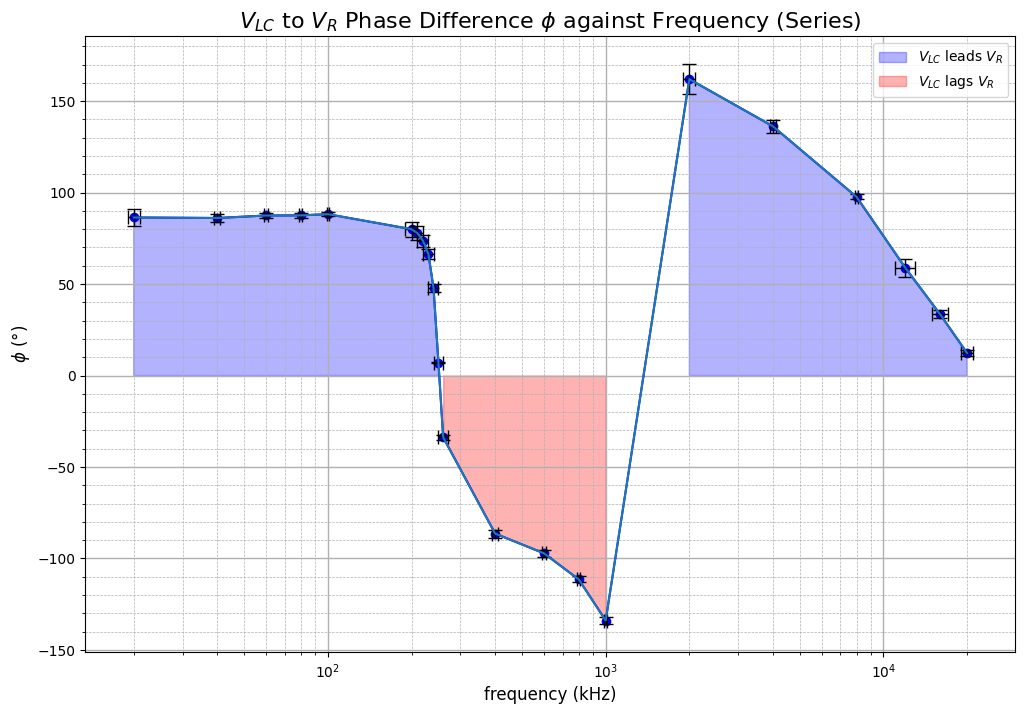

In [22]:
phi = [(360*freq*t*10**-6) for freq, t in zip(f, timeVVR)]

phi_unc = [np.abs(phi)*np.sqrt((t_unc/t)**2 + (f_unc/f)**2) for phi, t_unc, t, f_unc, f in zip(phi, VVR_unc, timeVVR, f_unc, f)]

plt.figure(figsize=(12, 8))
plt.plot(f, phi, marker='o', color='b')
plt.errorbar(f, phi, xerr=f_unc, yerr=phi_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()

plt.fill_between(f, phi, 0, where=(np.array(phi) > 0), color='blue', alpha=0.3, label='$V_{LC}$ leads $V_R$')
plt.fill_between(f, phi, 0, where=(np.array(phi) < 0), color='red', alpha=0.3, label='$V_{LC}$ lags $V_R$')
plt.title("$V_{LC}$ to $V_R$ Phase Difference $\phi$ against Frequency (Series)", fontsize=16)
plt.ylabel("$\phi$ ($\degree$)", fontsize=12)
plt.xlabel("frequency (kHz)", fontsize=12)
plt.legend()
#plt.savefig("RLC phiVVR-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### VC-VL Phase Shift vs Frequency (Processed)

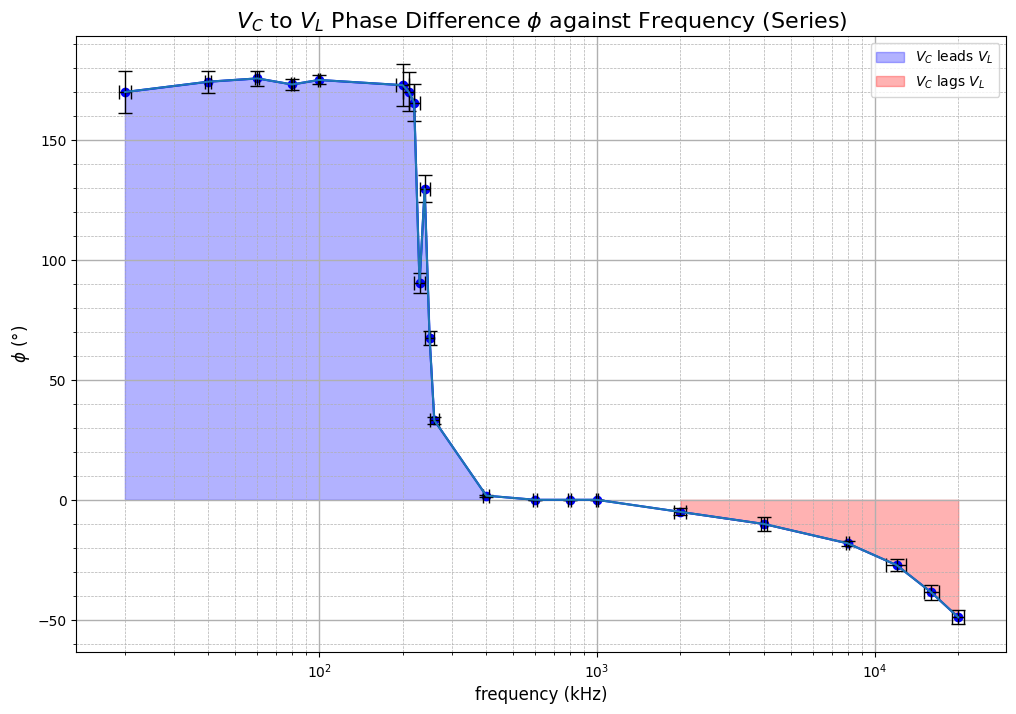

In [23]:
phi = [(360*freq*t*10**-6) for freq, t in zip(f, timeVCVL)]

phi_unc = [np.abs(phi)*np.sqrt((t_unc/(t if t != 0 else epsilon))**2 + (f_unc/f)**2) for phi, t_unc, t, f_unc, f in zip(phi, VCVL_unc, timeVCVL, f_unc, f)]

plt.figure(figsize=(12, 8))
plt.plot(f, phi, marker='o', color='b')
plt.errorbar(f, phi, xerr=f_unc, yerr=phi_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()

plt.fill_between(f, phi, 0, where=(np.array(phi) > 0), color='blue', alpha=0.3, label='$V_{C}$ leads $V_L$')
plt.fill_between(f, phi, 0, where=(np.array(phi) < 0), color='red', alpha=0.3, label='$V_{C}$ lags $V_L$')
plt.title("$V_{C}$ to $V_L$ Phase Difference $\phi$ against Frequency (Series)", fontsize=16)
plt.ylabel("$\phi$ ($\degree$)", fontsize=12)
plt.xlabel("frequency (kHz)", fontsize=12)
plt.legend()
#plt.savefig("RLC phiVCVL-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

# RLC Parallel

### Load data

In [24]:
df = pd.read_csv("RLC Parallel.csv")

f = df['frequency']
f_unc = df['f unc']
V = df['V']
V = [x / (2 * np.sqrt(2)) for x in V]
V_unc = df['V unc']
V_unc = [x / (2 * np.sqrt(2)) for x in V_unc]
VR = df['VR']
VR = [x / (2 * np.sqrt(2)) for x in VR]
VR_unc = df["VR unc"]
VR_unc = [x / (2 * np.sqrt(2)) for x in VR_unc]
time = df['time']
time_unc = df['time unc']

### V vs Frequency (Processed)

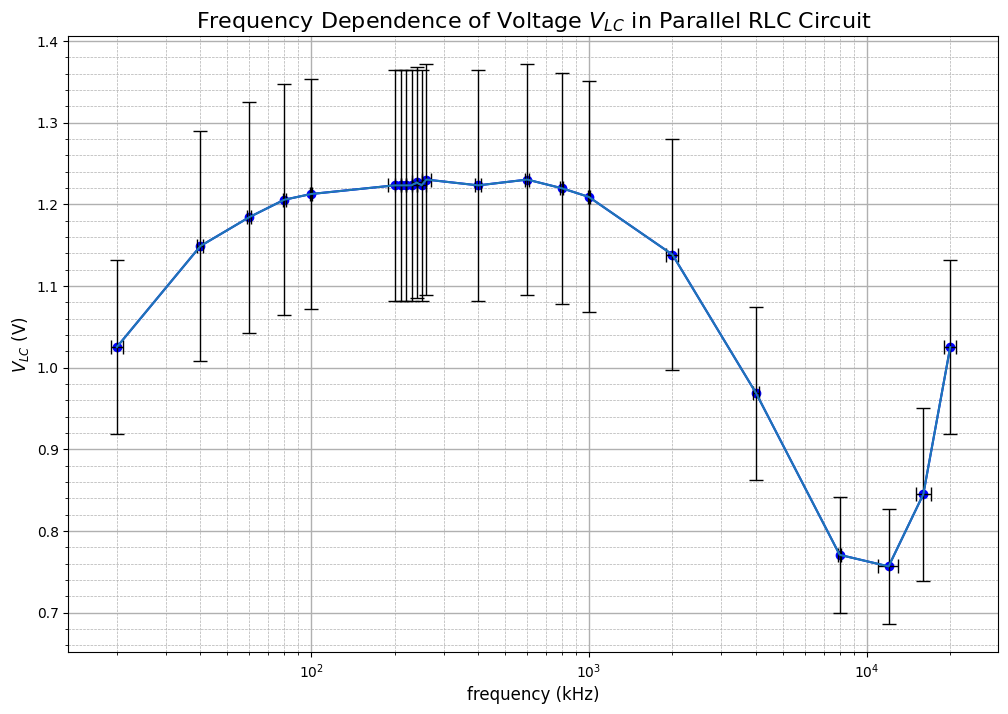

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(f, V, marker='o', color='blue')
plt.errorbar(f, V, xerr=f_unc, yerr=V_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of Voltage $V_{LC}$ in Parallel RLC Circuit", fontsize=16)
plt.ylabel("$V_{LC}$ (V)", fontsize=12)
plt.xlabel("frequency (kHz)", fontsize=12)
#plt.savefig("RLCp VLC-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### VR vs Frequency (Processed)

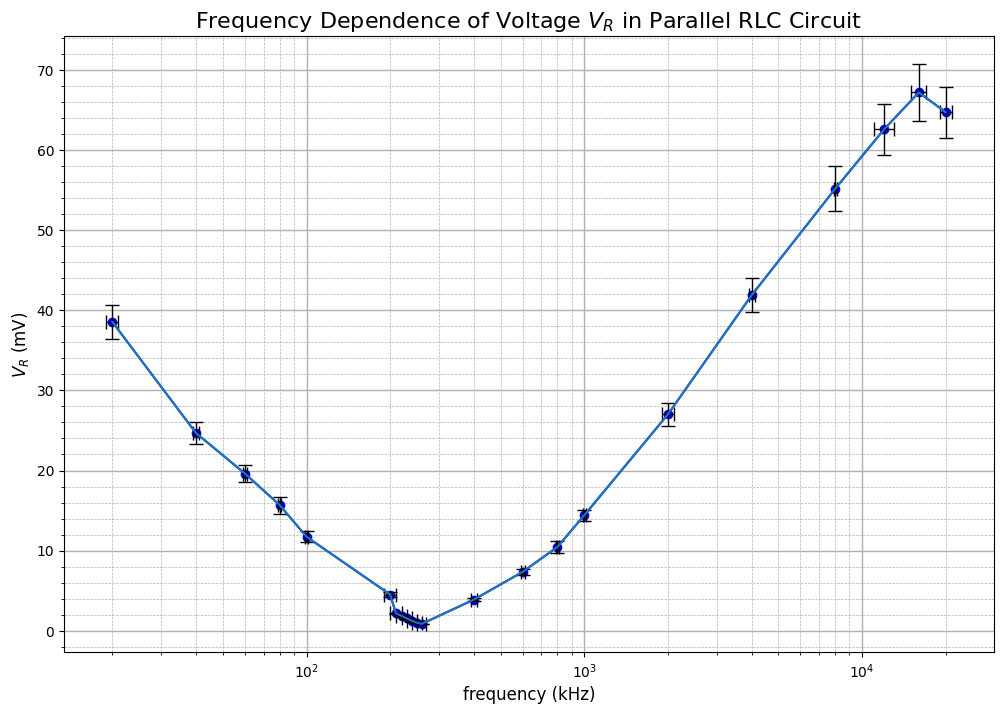

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(f, VR, marker='o', color='blue')
plt.errorbar(f, VR, xerr=f_unc, yerr=VR_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Frequency Dependence of Voltage $V_{R}$ in Parallel RLC Circuit", fontsize=16)
plt.ylabel("$V_{R}$ (mV)", fontsize=12)
plt.xlabel("frequency (kHz)", fontsize=12)
#plt.savefig("RLCp VR-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

### Phase Shift vs Frequency (Processed)

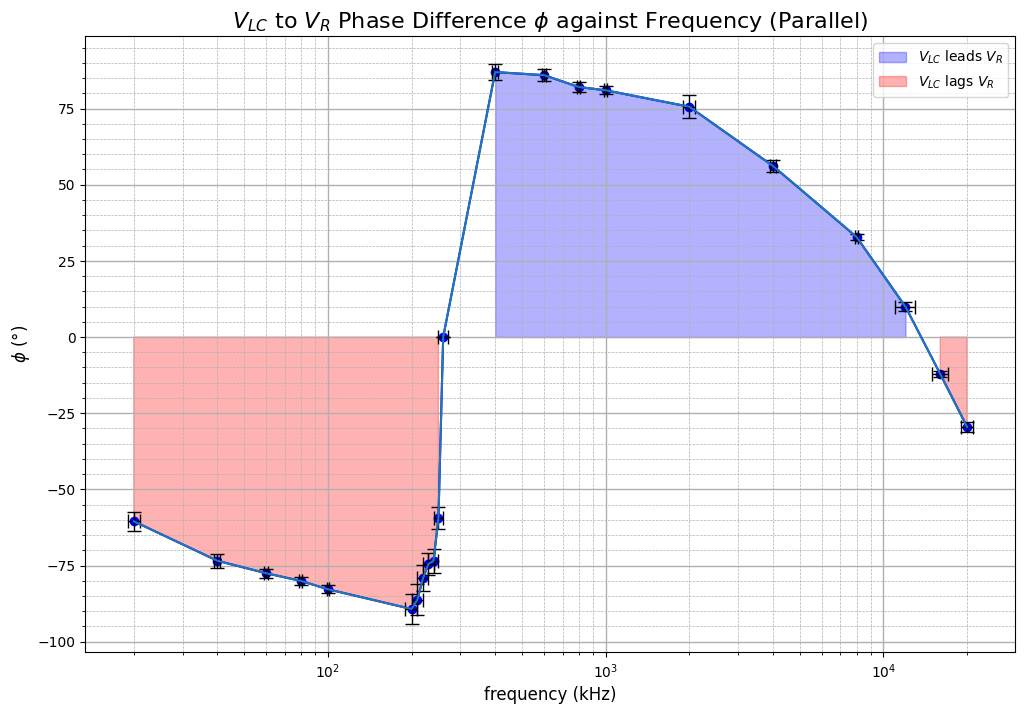

In [27]:
phi = [(360*freq*t*10**-3) for freq, t in zip(f, time)]

phi_unc = [np.abs(phi)*np.sqrt((t_unc/(t if t != 0 else epsilon))**2 + (f_unc/f)**2) for phi, t_unc, t, f_unc, f in zip(phi, time_unc, time, f_unc, f)]

plt.figure(figsize=(12, 8))
plt.plot(f, phi, marker='o', color='b')
plt.errorbar(f, phi, xerr=f_unc, yerr=phi_unc, capsize=5, capthick=1, elinewidth=1, ecolor='black')
plt.xscale('log')
plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()

plt.fill_between(f, phi, 0, where=(np.array(phi) > 0), color='blue', alpha=0.3, label='$V_{LC}$ leads $V_R$')
plt.fill_between(f, phi, 0, where=(np.array(phi) < 0), color='red', alpha=0.3, label='$V_{LC}$ lags $V_R$')
plt.title("$V_{LC}$ to $V_R$ Phase Difference $\phi$ against Frequency (Parallel)", fontsize=16)
plt.ylabel("$\phi$ ($\degree$)", fontsize=12)
plt.xlabel("frequency (kHz)", fontsize=12)
plt.legend()
#plt.savefig("RLCp phi-f.png", dpi=300, format="png", bbox_inches="tight")
plt.show();

# Transient Response

### Load Data

In [28]:
df1 = pd.read_csv("TRud1.csv")
peaks1 = df1['peaks']
peak_unc1 = df1['peak unc']

df2 = pd.read_csv("TRud2.csv")
peaks2 = df2['peaks']
peak_unc2 = df2['peak unc']

df3 = pd.read_csv("TRud3.csv")
peaks3 = df3['peaks']
peak_unc3 = df3['peak unc']

### Underdamped Response (processed)

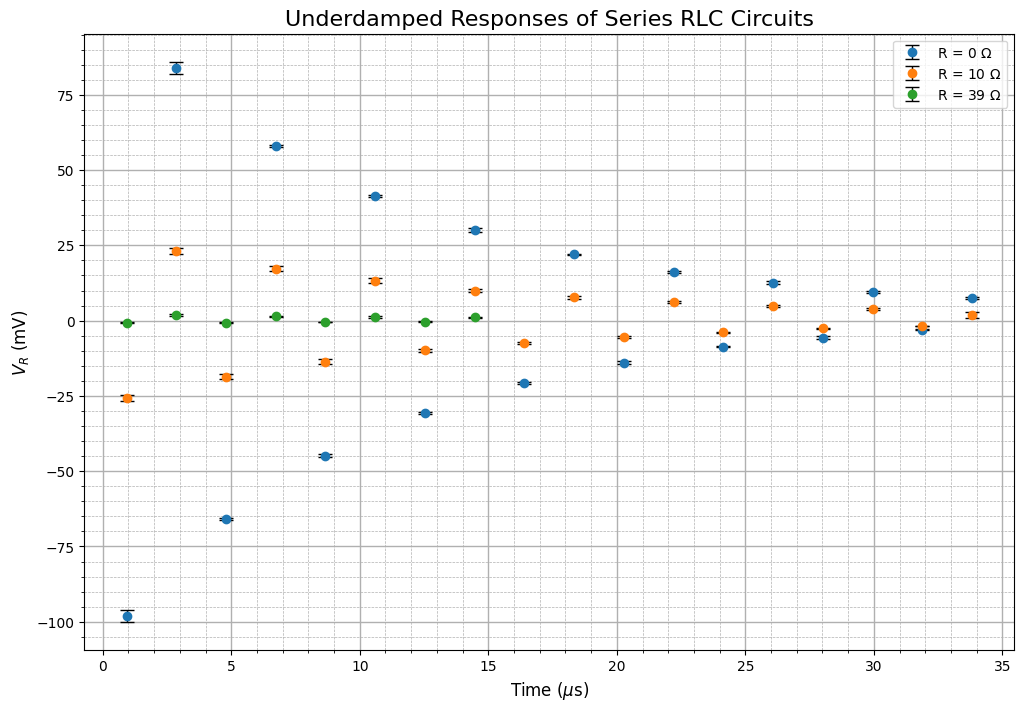

In [29]:
x1 = [n * 3.87 / 2 for n in range(len(peaks1))]
x1 = [x + 3.7 / 4 for x in x1]
y1 = [i for i in peaks1]
x1unc = [0.8] * len(x1)
y1unc = [item for item in peak_unc1]

x2 = [n * 3.87 / 2 for n in range(len(peaks2))]
x2 = [x + 3.7 / 4 for x in x2]
y2 = [i for i in peaks2]
x2unc = [0.8] * len(x2)
y2unc = [item for item in peak_unc2]

x3 = [n * 3.87 / 2 for n in range(len(peaks3))]
x3 = [x + 3.7 / 4 for x in x3]
y3 = [i for i in peaks3]
x3unc = [0.8] * len(x3)
y3unc = [item for item in peak_unc3]

plt.figure(figsize=(12, 8))
plt.errorbar(x1, y1, yerr=y1unc, fmt='o', capsize=5, capthick=1, elinewidth=1,label="R = 0 $\Omega$", ecolor='black')
plt.errorbar(x3, y3, yerr=y3unc, fmt='o', capsize=5, capthick=1, elinewidth=1,label="R = 10 $\Omega$", ecolor='black')
plt.errorbar(x2, y2, yerr=y2unc, fmt='o', capsize=5, capthick=1, elinewidth=1,label="R = 39 $\Omega$", ecolor='black')

plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()

plt.title("Underdamped Responses of Series RLC Circuits", fontsize=16)
plt.xlabel("Time ($\mu$s)", fontsize=12)
plt.ylabel("$V_R$ (mV)", fontsize=12)
plt.legend()
#plt.savefig("UDdatapoints.png", dpi=300, format="png", bbox_inches="tight")
plt.show()

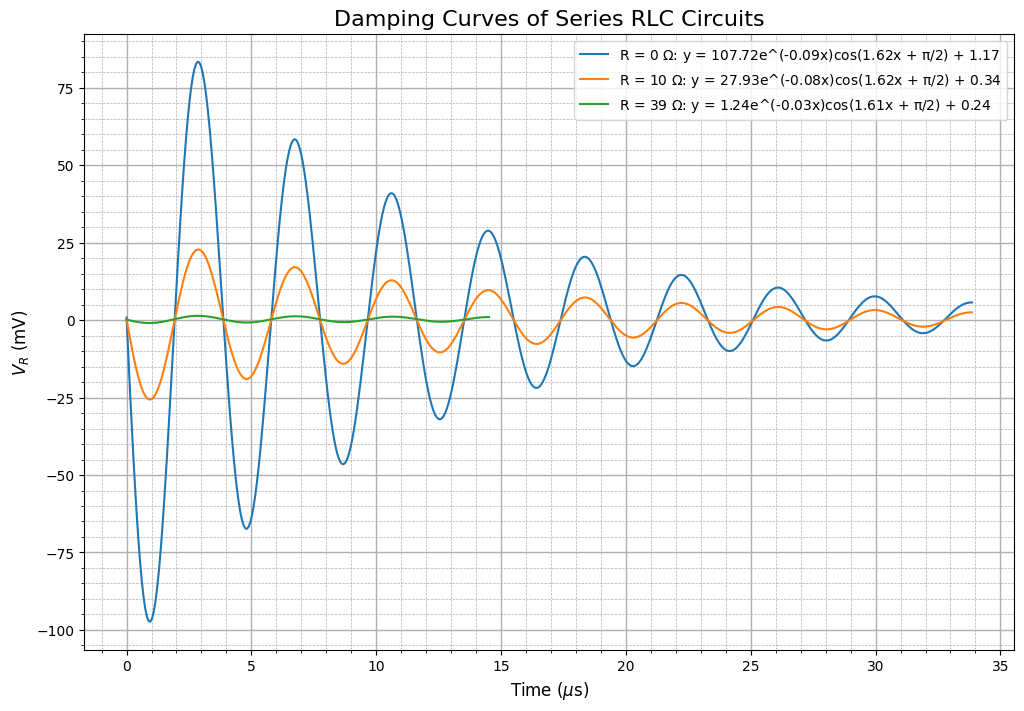

In [30]:
from scipy.optimize import curve_fit

def damped_sine(x, A, b, omega, phi, C):
    return A * np.exp(-b * x) * np.cos(omega * x + phi) + C
    
x_raw1 = [n * 3.87 / 4 for n in range(2 * len(peaks1))]
y_raw1 = [i for item in peaks1 for i in (0, item)]
x_raw2 = [n * 3.87 / 4 for n in range(2 * len(peaks2))]
y_raw2 = [i for item in peaks2 for i in (0, item)] 
x_raw3 = [n * 3.87 / 4 for n in range(2 * len(peaks3))] 
y_raw3 = [i for item in peaks3 for i in (0, item)]  

x_raw1 = np.array(x_raw1)
y_raw1 = np.array(y_raw1)
x_raw2 = np.array(x_raw2)
y_raw2 = np.array(y_raw2)
x_raw3 = np.array(x_raw3)
y_raw3 = np.array(y_raw3)

interp_func1 = interp1d(x_raw1, y_raw1, kind='cubic')
interp_func2 = interp1d(x_raw2, y_raw2, kind='cubic')
interp_func3 = interp1d(x_raw3, y_raw3, kind='cubic')

x_smooth1 = np.linspace(x_raw1[0], x_raw1[-1], 500)
y_smooth1 = interp_func1(x_smooth1)

x_smooth2 = np.linspace(x_raw2[0], x_raw2[-1], 500)
y_smooth2 = interp_func2(x_smooth2)

x_smooth3 = np.linspace(x_raw3[0], x_raw3[-1], 500)
y_smooth3 = interp_func3(x_smooth3)

initial_guess = [5, 0.3, 2 * np.pi * 0.5, 0.5, 1]

params1, _ = curve_fit(damped_sine, x_raw1, y_raw1, p0=initial_guess)
params2, _ = curve_fit(damped_sine, x_raw2, y_raw2, p0=initial_guess)
params3, _ = curve_fit(damped_sine, x_raw3, y_raw3, p0=initial_guess)

fitted_y1 = damped_sine(x_smooth1, *params1)
fitted_y2 = damped_sine(x_smooth2, *params2)
fitted_y3 = damped_sine(x_smooth3, *params3)

plt.figure(figsize=(12, 8))
plt.plot(x_smooth1, fitted_y1, label=f"R = 0 $\Omega$: y = {params1[0]:.2f}e^(-{params1[1]:.2f}x)cos({params1[2]:.2f}x + π/2) + {params1[4]:.2f}")
plt.plot(x_smooth3, fitted_y3, label=f"R = 10 $\Omega$: y = {params3[0]:.2f}e^(-{params3[1]:.2f}x)cos({params3[2]:.2f}x + π/2) + {params3[4]:.2f}")
plt.plot(x_smooth2, fitted_y2, label=f"R = 39 $\Omega$: y = {params2[0]:.2f}e^(-{params2[1]:.2f}x)cos({params2[2]:.2f}x + π/2) + {params2[4]:.2f}")

plt.grid(True, which='major', linestyle='-', linewidth=1.0)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.title("Damping Curves of Series RLC Circuits", fontsize=16)
plt.xlabel("Time ($\mu$s)", fontsize=12)
plt.ylabel("$V_R$ (mV)", fontsize=12)
plt.legend()
#plt.savefig("UDfitting.png", dpi=300, format="png", bbox_inches="tight")
plt.show()